In [1]:
pip install pandas scikit-learn xgboost matplotlib seaborn shap fairlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 4.0 MB/s eta 0:00:00


✅ 資料前幾筆：
   rev_util   age  late_30_59  debt_ratio  monthly_inc  open_credit  late_90  \
0  0.006999  38.0         0.0    0.302150       5440.0          4.0      0.0   
1  0.704592  63.0         0.0    0.471441       8000.0          9.0      0.0   
2  0.063113  57.0         0.0    0.068586       5000.0         17.0      0.0   
3  0.368397  68.0         0.0    0.296273       6250.0         16.0      0.0   
4  1.000000  34.0         1.0    0.000000       3500.0          0.0      0.0   

   real_estate  late_60_89  dependents  dlq_2yrs  
0          1.0         0.0         3.0         0  
1          1.0         0.0         0.0         0  
2          0.0         0.0         0.0         0  
3          2.0         0.0         0.0         0  
4          0.0         0.0         1.0         0  

✅ 資料維度： (16714, 11)

✅ 資料欄位型態：
rev_util       float64
age            float64
late_30_59     float64
debt_ratio     float64
monthly_inc    float64
open_credit    float64
late_90        float64
real_estate

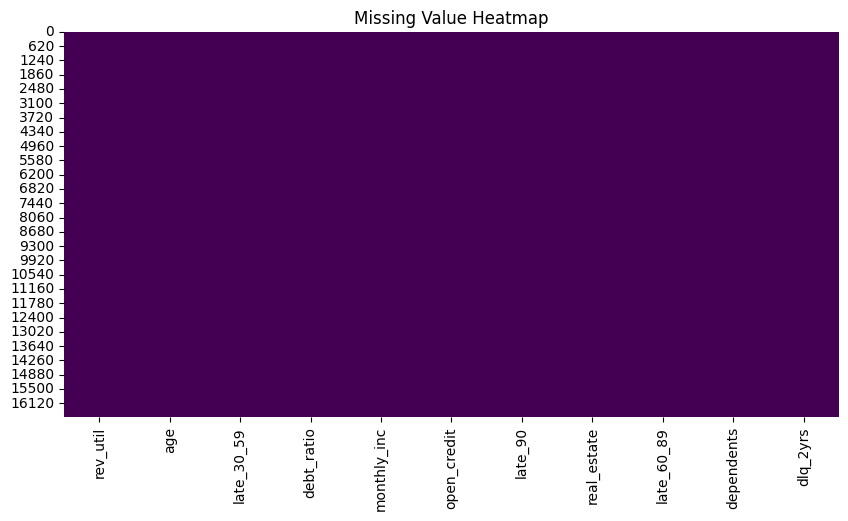


✅ 目標變數比例：
dlq_2yrs
0    0.5
1    0.5
Name: proportion, dtype: float64


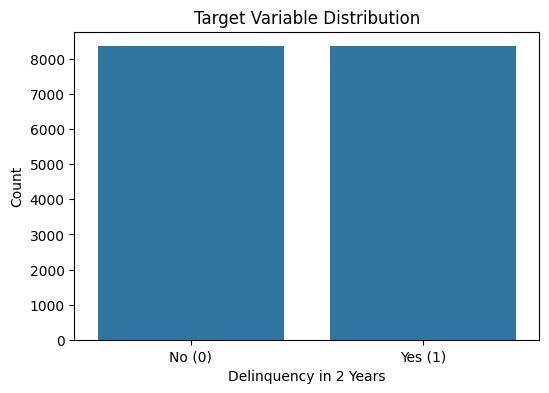


✅ 數值特徵描述統計：
           rev_util           age    late_30_59    debt_ratio    monthly_inc  \
count  16714.000000  16714.000000  16714.000000  16714.000000   16714.000000   
mean       4.799862     48.798672      1.110267     30.980298    6118.120258   
std      204.062345     13.906078      7.172890    719.694859    5931.841779   
min        0.000000     21.000000      0.000000      0.000000       0.000000   
25%        0.082397     38.000000      0.000000      0.155971    3128.500000   
50%        0.443080     48.000000      0.000000      0.322299    5000.000000   
75%        0.926637     58.000000      1.000000      0.533426    7573.000000   
max    22000.000000    101.000000     98.000000  61106.500000  250000.000000   

        open_credit       late_90   real_estate    late_60_89    dependents  \
count  16714.000000  16714.000000  16714.000000  16714.000000  16714.000000   
mean       8.503709      0.863827      1.047445      0.734354      0.944358   
std        5.370965      7.16

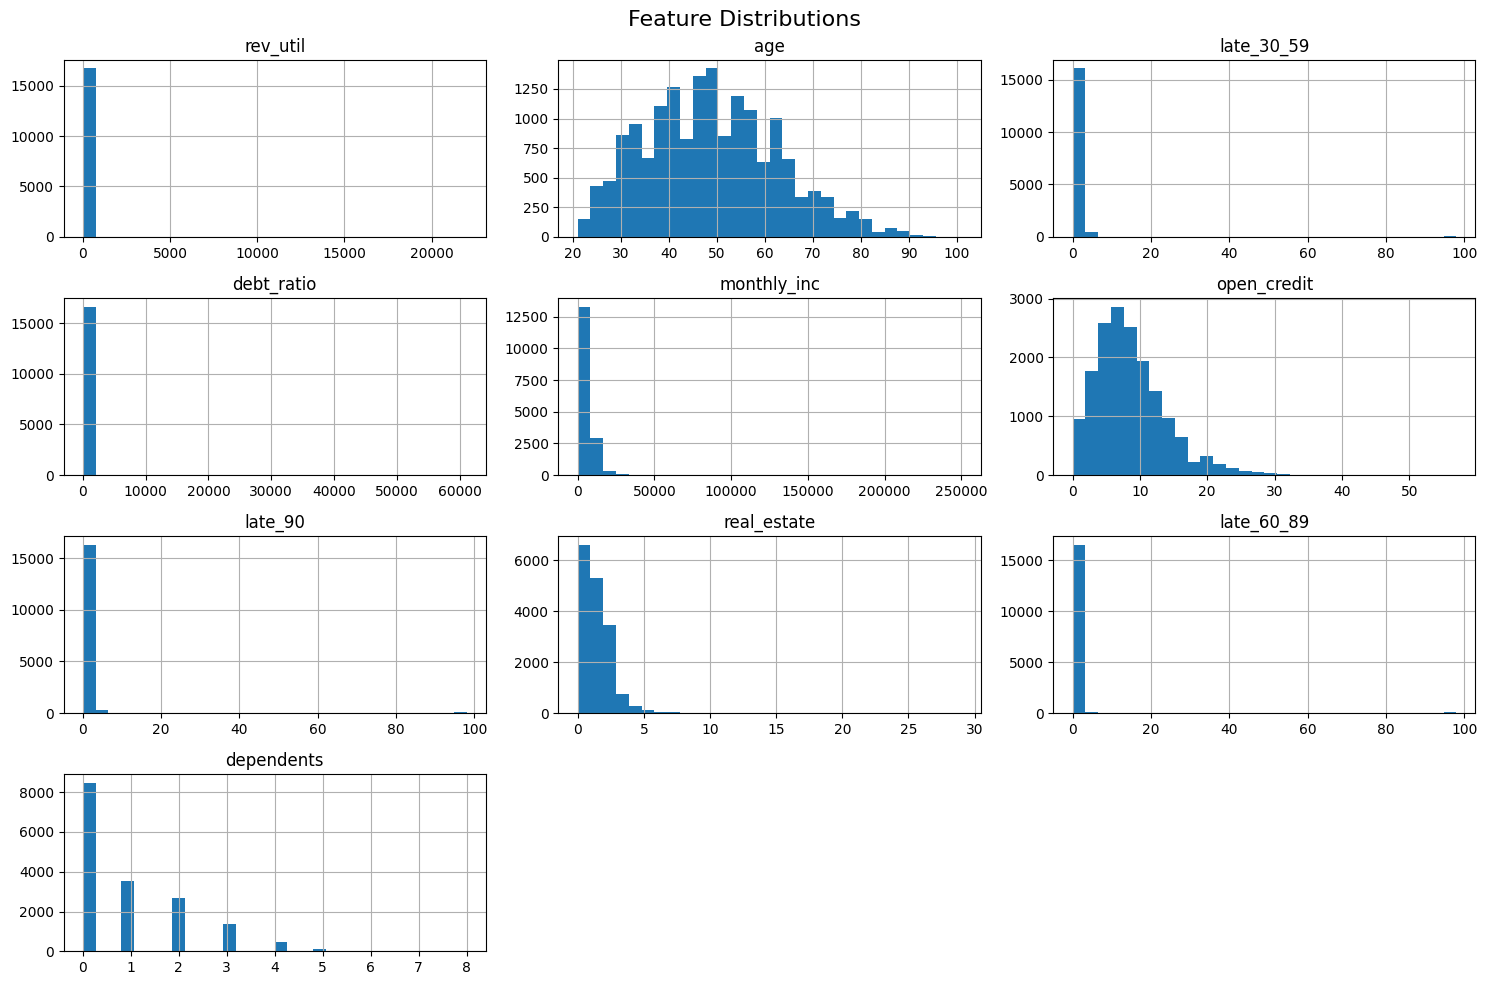

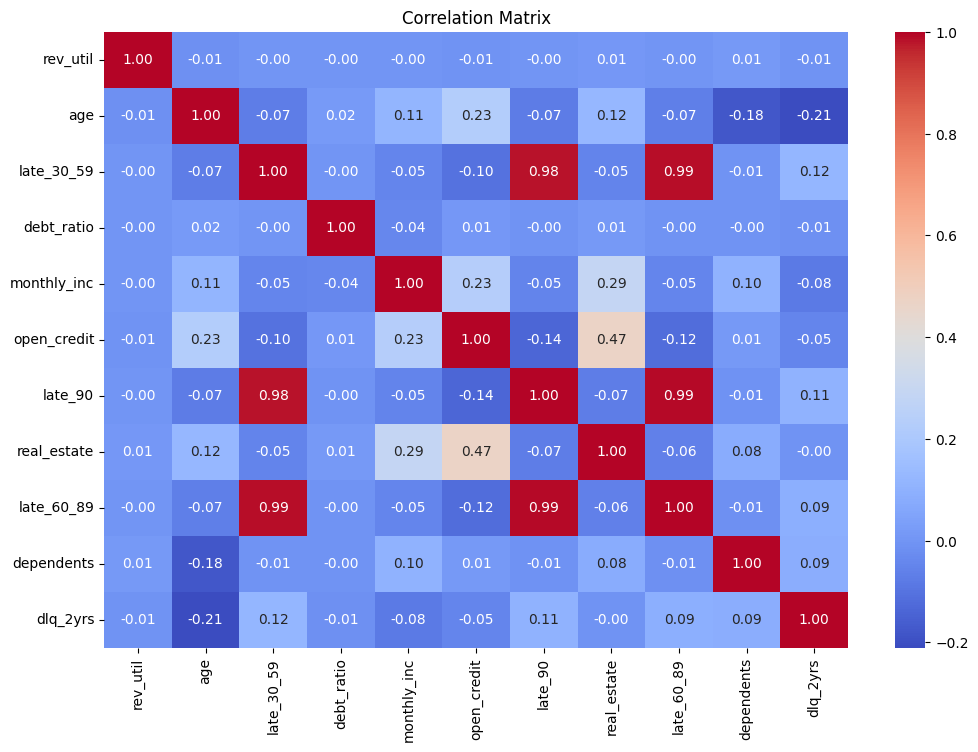

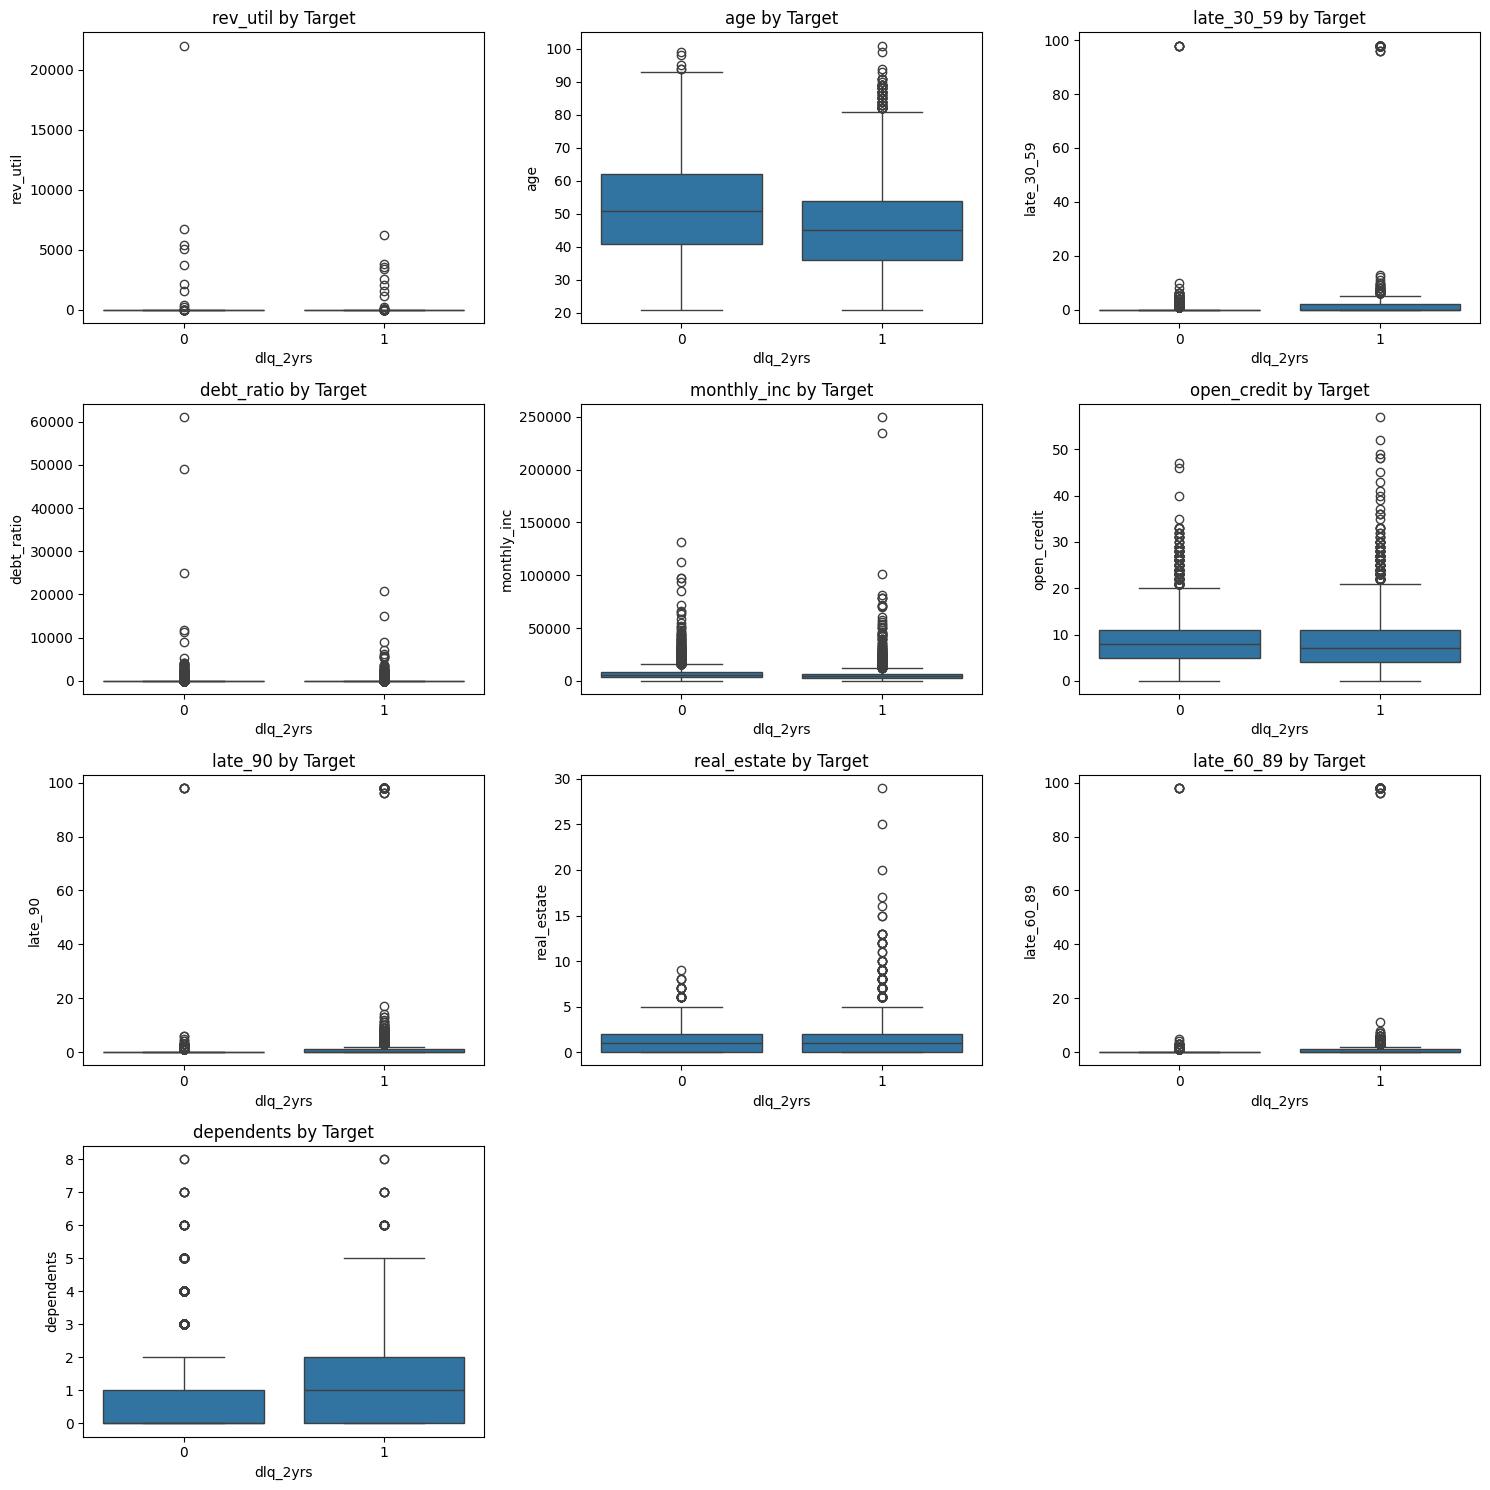


✅ 分箱分佈：

age_binned:
                count      mean
age_binned                     
(20.999, 36.0]   3530  0.615014
(36.0, 44.0]     3196  0.562265
(44.0, 52.0]     3636  0.543729
(52.0, 61.0]     3238  0.451822
(61.0, 101.0]    3114  0.304753

debt_ratio_binned:
                   count      mean
debt_ratio_binned                 
(-0.001, 0.119]     3343  0.465151
(0.119, 0.255]      3343  0.453784
(0.255, 0.394]      3342  0.447636
(0.394, 0.604]      3343  0.521687
(0.604, 61106.5]    3343  0.611726

rev_util_binned:
                    count     mean
rev_util_binned                   
(-22.0, 4400.0]     16709  0.50009
(4400.0, 8800.0]        4  0.25000
(8800.0, 13200.0]       0      NaN
(13200.0, 17600.0]      0      NaN
(17600.0, 22000.0]      1  0.00000

monthly_inc_binned:
                    count      mean
monthly_inc_binned                 
(-0.001, 2800.0]     3367  0.574993
(2800.0, 4200.0]     3396  0.570082
(4200.0, 5833.0]     3289  0.503497
(5833.0, 8400.0]     3322

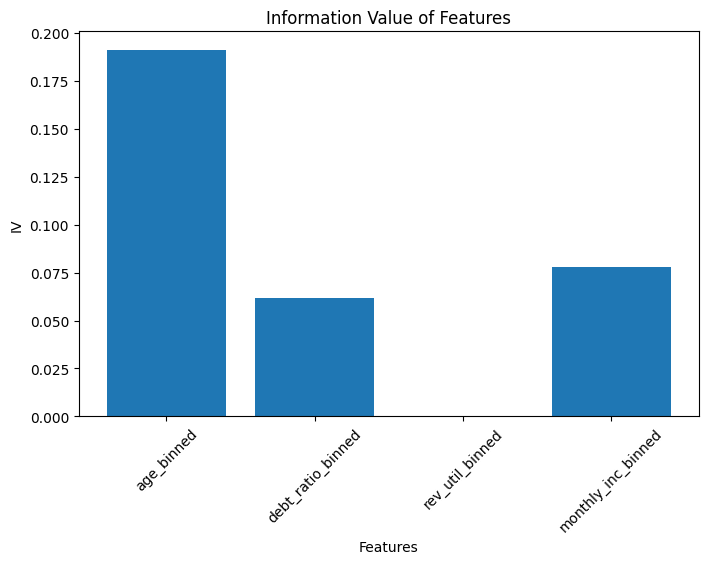


✅ 標準化後的資料前幾筆：
   rev_util       age  late_30_59  debt_ratio  monthly_inc  open_credit  \
0 -0.023488 -0.776567   -0.154791   -0.042628    -0.114322    -0.838554   
1 -0.020069  1.021262   -0.154791   -0.042393     0.317260     0.092405   
2 -0.023213  0.589783   -0.154791   -0.042952    -0.188500     1.581940   
3 -0.021717  1.380828   -0.154791   -0.042636     0.022233     1.395748   
4 -0.018622 -1.064219   -0.015373   -0.043048    -0.441380    -1.583322   

    late_90  real_estate  late_60_89  dependents  
0 -0.120522    -0.037284   -0.102872    1.714814  
1 -0.120522    -0.037284   -0.102872   -0.787782  
2 -0.120522    -0.823123   -0.102872   -0.787782  
3 -0.120522     0.748554   -0.102872   -0.787782  
4 -0.120522    -0.823123   -0.102872    0.046416  


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取資料
df = pd.read_csv("/content/Credit Risk Benchmark Dataset.csv")

# ===== 1. 初步資料檢視 =====
print("✅ 資料前幾筆：")
print(df.head())

print("\n✅ 資料維度：", df.shape)

print("\n✅ 資料欄位型態：")
print(df.dtypes)

# 檢查類別變數
print("\n✅ 類別變數概況：")
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

# ===== 2. 缺失值檢查 =====
print("\n✅ 缺失值概況：")

# 檢查缺失值並填補（若有）
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print("\n✅ 使用中位數填補缺失值：")
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())
    print("✅ 填補後的缺失值概況：")
    print(df.isnull().sum())
else:
    print("\n✅ 無缺失值，無需填補。")

# 視覺化缺失值（若有）
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()


# ===== 3. 目標變數比例 =====
target_counts = df['dlq_2yrs'].value_counts(normalize=True)
print("\n✅ 目標變數比例：")
print(target_counts)

# 視覺化
plt.figure(figsize=(6, 4))
sns.countplot(x='dlq_2yrs', data=df)
plt.title("Target Variable Distribution")
plt.xlabel("Delinquency in 2 Years")
plt.ylabel("Count")
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
plt.show()

# ===== 4. 數值特徵的描述統計 =====
print("\n✅ 數值特徵描述統計：")
print(df.describe())

# ===== 5. 分佈圖（直方圖） =====
df.drop('dlq_2yrs', axis=1).hist(bins=30, figsize=(15, 10), layout=(4, 3))
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

# ===== 6. 相關性矩陣 =====
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# ===== 7. Boxplot 觀察離群值與群體差異（以目標變數分組） =====
features = df.columns.drop('dlq_2yrs')
plt.figure(figsize=(15, 15))
for i, feature in enumerate(features):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x='dlq_2yrs', y=feature, data=df)
    plt.title(f"{feature} by Target")
    plt.tight_layout()
plt.show()
# ===== 8. 特徵工程：分箱與 IV 計算 =====
# 對連續變數進行分箱（rev_util 使用等寬分箱）
continuous_features = ['age', 'debt_ratio', 'rev_util', 'monthly_inc']
for feature in continuous_features:
    if feature == 'rev_util':
        # 等寬分箱以處理極端值
        df[f'{feature}_binned'] = pd.cut(df[feature], bins=5, duplicates='drop')
    else:
        df[f'{feature}_binned'] = pd.qcut(df[feature], q=5, duplicates='drop')

# 檢查所有分箱分佈
print("\n✅ 分箱分佈：")
for feature in continuous_features:
    print(f"\n{feature}_binned:")
    print(df.groupby(f'{feature}_binned')['dlq_2yrs'].agg(['count', 'mean']))

# 定義 IV 計算函數
def calculate_iv(df, feature, target):
    total_good = df[target].value_counts()[0]
    total_bad = df[target].value_counts()[1]
    groups = df.groupby(feature)[target].agg(['count', 'sum'])
    groups['good'] = groups['count'] - groups['sum']
    groups['bad'] = groups['sum']
    groups['good_dist'] = (groups['good'] + 0.5) / (total_good + 0.5 * len(groups))
    groups['bad_dist'] = (groups['bad'] + 0.5) / (total_bad + 0.5 * len(groups))
    groups['WOE'] = np.log(groups['good_dist'] / groups['bad_dist']).replace([np.inf, -np.inf], 0)
    groups['IV'] = (groups['good_dist'] - groups['bad_dist']) * groups['WOE']
    return groups['IV'].sum()

# 計算 IV
features = [f'{feat}_binned' for feat in continuous_features]
iv_results = {f: calculate_iv(df, f, 'dlq_2yrs') for f in features}
print("\n✅ 特徵 IV 值（分箱後）：")
for feature, iv in iv_results.items():
    print(f"{feature}: {iv:.4f}")

# 視覺化 IV 結果
plt.figure(figsize=(8, 5))
plt.bar(iv_results.keys(), iv_results.values())
plt.title("Information Value of Features")
plt.xlabel("Features")
plt.ylabel("IV")
plt.xticks(rotation=45)
plt.show()

# ===== 9. 特徵標準化 =====
# 僅對數值型欄位進行標準化（排除分箱欄位和目標變數）
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.drop('dlq_2yrs')
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
print("\n✅ 標準化後的資料前幾筆：")
print(df[numeric_columns].head())

=== Baseline Modeling ===


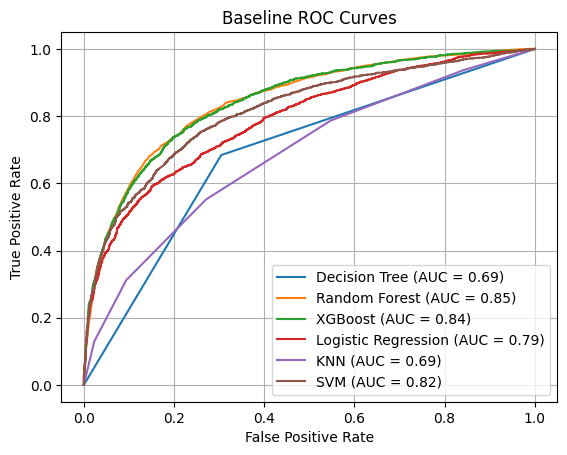

Selected Features: ['age', 'late_30_59', 'late_90', 'late_60_89', 'dependents']
=== Modeling After Feature Selection ===


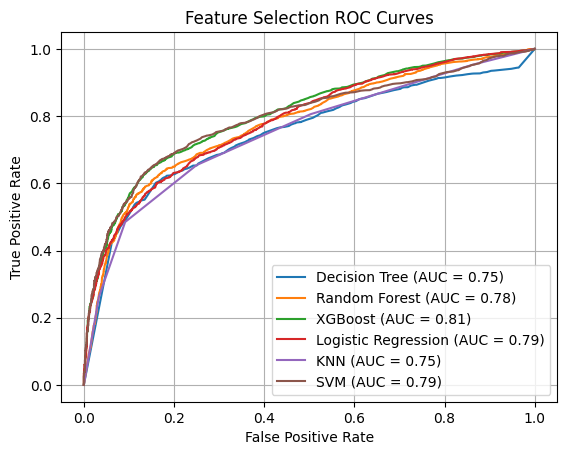

100%|===================| 5013/5015 [00:24<00:00]       

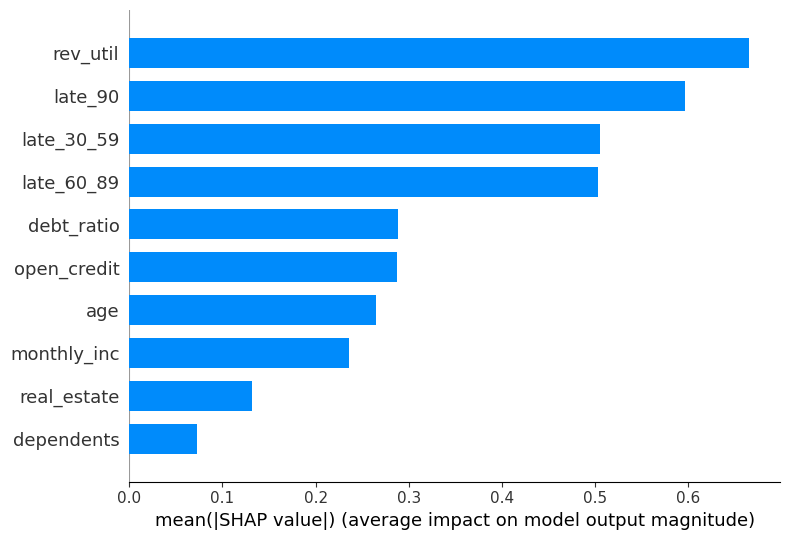

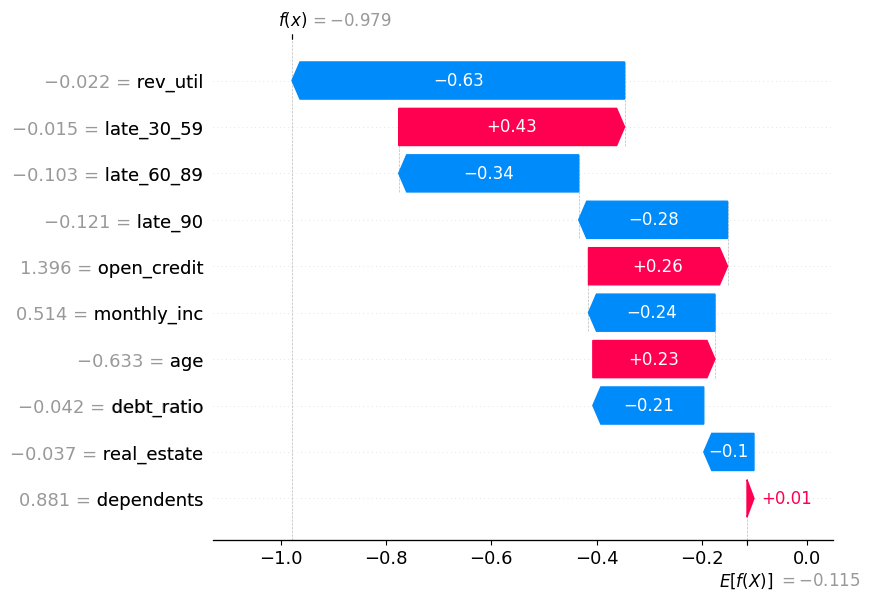

Fairness (Equal Opportunity Difference): 0.9361898483849703

=== Baseline Results ===
                     Accuracy    Recall        F1       AUC
Random Forest        0.766899  0.746076  0.760303  0.845310
XGBoost              0.767498  0.747686  0.761163  0.843761
SVM                  0.727019  0.583099  0.679166  0.815310
Logistic Regression  0.714656  0.641046  0.690058  0.790083
Decision Tree        0.689731  0.684105  0.686037  0.689681
KNN                  0.641276  0.552113  0.604006  0.685466

=== Feature Selection Results ===
                     Accuracy    Recall        F1       AUC
XGBoost              0.748554  0.647082  0.718338  0.805216
SVM                  0.731805  0.568209  0.677381  0.794585
Logistic Regression  0.713260  0.633400  0.686437  0.785252
Random Forest        0.729811  0.609256  0.690851  0.780003
KNN                  0.702493  0.654326  0.685497  0.751416
Decision Tree        0.709671  0.551308  0.653003  0.749220


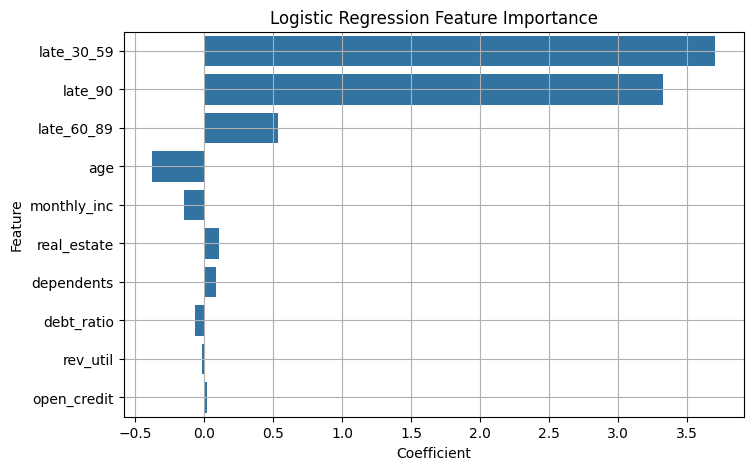

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import shap
from fairlearn.metrics import MetricFrame, equalized_odds_difference
import warnings
warnings.filterwarnings("ignore")

# 1. 讀取資料
df = pd.read_csv("/content/Credit Risk Benchmark Dataset.csv")

# 2. 預處理
df = df.dropna()
X = df.drop('dlq_2yrs', axis=1)
y = df['dlq_2yrs']

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 訓練測試集切分
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 3. 定義模型
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True)
}

# 4. 訓練與評估函數
def evaluate_models(X_train, X_test, y_train, y_test, models, stage='Baseline'):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        acc = accuracy_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

        results[name] = {
            'Accuracy': acc,
            'Recall': rec,
            'F1': f1,
            'AUC': auc
        }

    plt.title(f'{stage} ROC Curves')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

    return pd.DataFrame(results).T

# 5. 初次建模
print("=== Baseline Modeling ===")
baseline_results = evaluate_models(X_train, X_test, y_train, y_test, models)

# 6. 特徵選擇
selector = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support()].tolist()
print(f"Selected Features: {selected_features}")

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_new, y, test_size=0.3, random_state=42)

# 7. 特徵篩選後建模
print("=== Modeling After Feature Selection ===")
fs_results = evaluate_models(X_train_fs, X_test_fs, y_train_fs, y_test_fs, models, stage='Feature Selection')

# 8. SHAP分析（使用XGBoost）
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
X_test_df = pd.DataFrame(X_test, columns=X.columns)
explainer = shap.Explainer(xgb, X_train)
shap_values = explainer(X_test_df)
shap.summary_plot(shap_values, X_test_df, plot_type='bar')
shap.plots.waterfall(shap_values[0])

# 9. 公平性評估（以年齡為敏感群體示例）
age_group = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80, 100], labels=False)
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

metric_frame = MetricFrame(
    metrics={'recall': recall_score},
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=age_group.iloc[y_test.index]
)
print("Fairness (Equal Opportunity Difference):", equalized_odds_difference(y_test, y_pred, sensitive_features=age_group.iloc[y_test.index]))

# 10. 模型總結
print("\n=== Baseline Results ===")
print(baseline_results.sort_values('AUC', ascending=False))
print("\n=== Feature Selection Results ===")
print(fs_results.sort_values('AUC', ascending=False))

# 11. Logistic Regression 特徵重要性
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(data=coef_df, x='Coefficient', y='Feature')
plt.title('Logistic Regression Feature Importance')
plt.grid(True)
plt.show()